In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

In [2]:
ads_date = pd.read_csv('C:/Users/spit/Desktop/cur/karpov_1/Python/ads_data.csv')

In [3]:
ads_date.head()

,ad_id,time,event,date,ad_cost_type,has_video,client_union_id,campaign_union_id,platform,ad_cost,target_audience_count,user_id
0,23456,1554076848,view,2019-04-01,CPM,0,5681,23456,android,190.0,125560,793
1,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,1041
2,111941,1554135866,view,2019-04-01,CPM,0,111793,111941,ios,215.2,32277,41
3,42987,1554135866,view,2019-04-01,CPM,0,28541,42985,ios,199.1,80160,898
4,23456,1554135866,view,2019-04-01,CPM,0,5681,23456,web,190.0,125560,29


In [4]:
ads_date.dtypes

ad_id                      int64
time                       int64
event                     object
date                      object
ad_cost_type              object
has_video                  int64
client_union_id            int64
campaign_union_id          int64
platform                  object
ad_cost                  float64
target_audience_count      int64
user_id                    int64
dtype: object

In [5]:
ads_date['date'] = pd.to_datetime(ads_date['date'])

In [6]:
df = ads_date.groupby(['ad_id', 'ad_cost_type', 'platform','event'], as_index=False) \
    .agg({'user_id':'count'})
df.head()

,ad_id,ad_cost_type,platform,event,user_id
0,3,CPC,android,click,5
1,3,CPC,android,view,244
2,3,CPC,ios,click,3
3,3,CPC,ios,view,147
4,3,CPC,web,click,1


In [7]:
df = df.pivot(index = ['ad_id', 'ad_cost_type', 'platform'], columns='event', values='user_id').reset_index()
df.head()

event,ad_id,ad_cost_type,platform,click,view
0,3,CPC,android,5.0,244.0
1,3,CPC,ios,3.0,147.0
2,3,CPC,web,1.0,99.0
3,2132,CPC,android,1.0,55.0
4,2132,CPC,ios,NaN,26.0


In [8]:
cost_type_df = df.groupby(['ad_id', 'ad_cost_type'], as_index=False) \
    .agg({'click':'sum', 'view':'sum'})

In [9]:
cost_type_df = cost_type_df.query('view > 100 & click > 0')

In [10]:
cost_type_df['ctr'] = cost_type_df.click / cost_type_df.view

In [11]:
cost_type_df['ctr_log'] = np.log(cost_type_df['ctr'])

In [12]:
cost_type_df

event,ad_id,ad_cost_type,click,view,ctr,ctr_log
0,3,CPC,9.0,490.0,0.018367,-3.997181
2,2276,CPC,2.0,1454.0,0.001376,-6.588926
4,2643,CPM,3.0,286.0,0.010490,-4.557380
5,4585,CPC,53.0,476.0,0.111345,-2.195126
6,4877,CPC,5.0,2160.0,0.002315,-6.068426
...,...,...,...,...,...,...
350,121941,CPM,1.0,640.0,0.001563,-6.461468
351,121943,CPC,15.0,1722.0,0.008711,-4.743191
352,122042,CPM,1.0,155.0,0.006452,-5.043425
353,122063,CPM,1.0,260.0,0.003846,-5.560682


<Axes: xlabel='ad_cost_type', ylabel='ctr'>

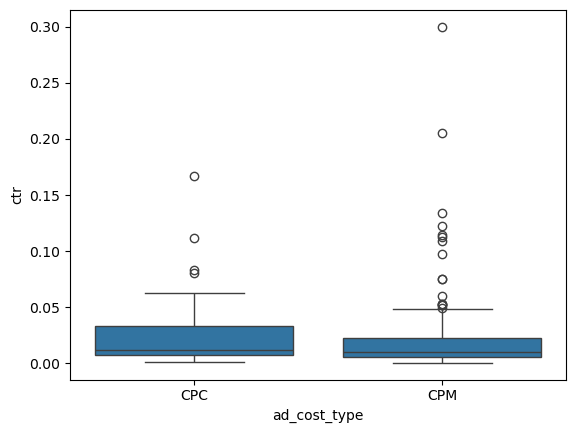

In [13]:
sns.boxplot(x='ad_cost_type', y='ctr', data=cost_type_df)

In [14]:
cost_type_df.groupby('ad_cost_type').agg({'ctr':'median'})

event,ctr
ad_cost_type,
CPC,0.012019
CPM,0.010490


In [15]:
cost_type_df.groupby('ad_cost_type').agg({'ctr':'mean'})

event,ctr
ad_cost_type,
CPC,0.024107
CPM,0.019467


C:\Users\spit\AppData\Local\Temp\ipykernel_5832\1730320536.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(cost_type_df.ctr))


<Axes: xlabel='ctr', ylabel='Density'>

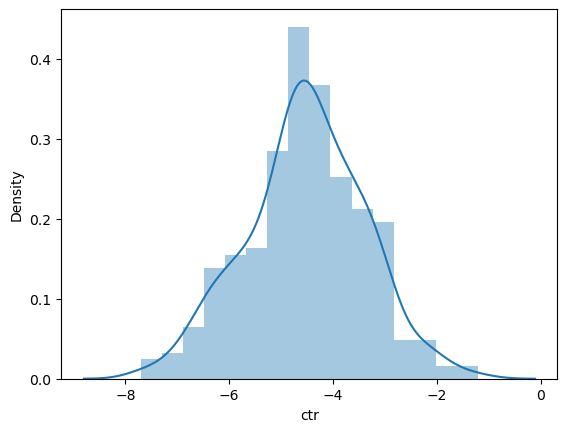

In [16]:
sns.distplot(np.log(cost_type_df.ctr))

C:\Users\spit\AppData\Local\Temp\ipykernel_5832\3858719707.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cost_type_df.ctr)


<Axes: xlabel='ctr', ylabel='Density'>

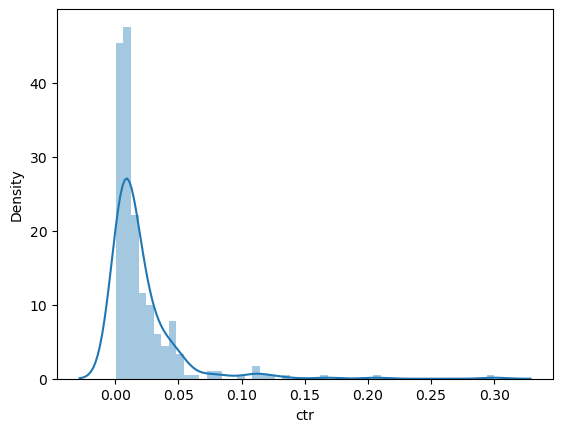

In [17]:
sns.distplot(cost_type_df.ctr)

In [18]:
cost_type_df

event,ad_id,ad_cost_type,click,view,ctr,ctr_log
0,3,CPC,9.0,490.0,0.018367,-3.997181
2,2276,CPC,2.0,1454.0,0.001376,-6.588926
4,2643,CPM,3.0,286.0,0.010490,-4.557380
5,4585,CPC,53.0,476.0,0.111345,-2.195126
6,4877,CPC,5.0,2160.0,0.002315,-6.068426
...,...,...,...,...,...,...
350,121941,CPM,1.0,640.0,0.001563,-6.461468
351,121943,CPC,15.0,1722.0,0.008711,-4.743191
352,122042,CPM,1.0,155.0,0.006452,-5.043425
353,122063,CPM,1.0,260.0,0.003846,-5.560682


In [19]:
cost_type_df[cost_type_df.ad_cost_type =='CPC'].ctr_log

0     -3.997181
2     -6.588926
5     -2.195126
6     -6.068426
7     -3.704823
11    -5.831882
13    -4.018549
14    -4.766438
15    -2.523226
17    -4.884694
19    -6.898715
20    -4.655863
21    -4.139159
25    -3.061386
31    -3.212187
32    -3.459466
34    -3.356746
37    -6.362597
52    -4.897840
54    -4.826712
82    -4.801285
106   -4.525405
117   -5.284218
120   -4.695011
125   -1.787876
151   -4.882802
155   -3.107436
228   -3.791737
245   -4.586242
254   -4.686952
255   -4.881286
256   -3.309630
258   -3.222790
259   -3.530553
266   -5.755215
270   -3.367296
279   -3.672496
284   -2.981276
295   -2.484907
300   -4.337291
301   -4.424847
304   -4.789573
306   -4.382027
321   -3.719651
322   -5.499215
332   -4.465908
333   -3.258097
334   -4.409763
335   -7.006695
336   -4.421247
337   -6.312944
340   -7.013016
348   -2.768245
351   -4.743191
354   -3.688379
Name: ctr_log, dtype: float64

In [20]:
cost_type_df[cost_type_df.ad_cost_type =='CPM'].ctr_log

4     -4.557380
8     -3.751854
9     -4.143135
10    -3.392269
12    -4.727388
         ...   
346   -3.533687
349   -4.424847
350   -6.461468
352   -5.043425
353   -5.560682
Name: ctr_log, Length: 247, dtype: float64

In [21]:
ttest_ind(cost_type_df[cost_type_df.ad_cost_type =='CPC'].ctr_log,
         cost_type_df[cost_type_df.ad_cost_type =='CPM'].ctr_log)

TtestResult(statistic=1.1407296867039143, pvalue=0.25489224816951805, df=300.0)

если бы была верна 0 гипотиза(ctrы ad_cost_type CPC и CPM отличаются), то вероянтность получить такие или еще более экстремальные данные составили бы 25%. Мы не смогли отклонить гипотизу, о том что ctrы ad_cost_type CPC и CPM отличаются. \
скорее всего различаются из-за рандома

In [22]:
platform_df = df.groupby(['ad_id', 'platform'], as_index=False) \
    .agg({'click':'sum', 'view':'sum'})

In [23]:
platform_df = platform_df.query('view > 100 & click > 0')

In [24]:
platform_df['ctr'] = platform_df.click / platform_df.view

In [25]:
platform_df['ctr_log'] = np.log(platform_df.click / platform_df.view)

In [26]:
platform_df.head()

event,ad_id,platform,click,view,ctr,ctr_log
0,3,android,5.0,244.0,0.020492,-3.887730
1,3,ios,3.0,147.0,0.020408,-3.891820
6,2276,android,2.0,703.0,0.002845,-5.862210
15,4585,android,17.0,224.0,0.075893,-2.578433
16,4585,ios,24.0,148.0,0.162162,-1.819158


<Axes: xlabel='platform', ylabel='ctr_log'>

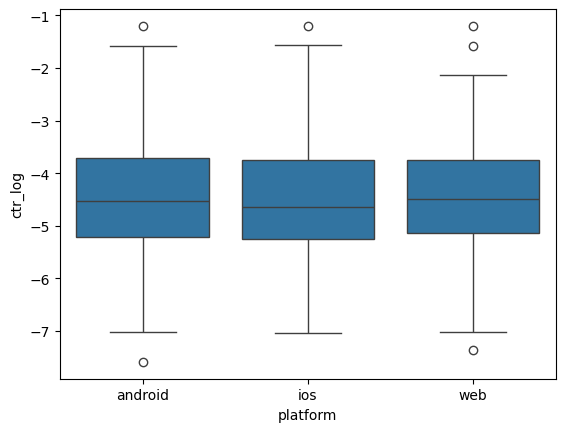

In [27]:
sns.boxplot(x='platform', y = 'ctr_log', data =platform_df )

C:\Users\spit\AppData\Local\Temp\ipykernel_5832\765944427.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(platform_df.ctr_log)


<Axes: xlabel='ctr_log', ylabel='Density'>

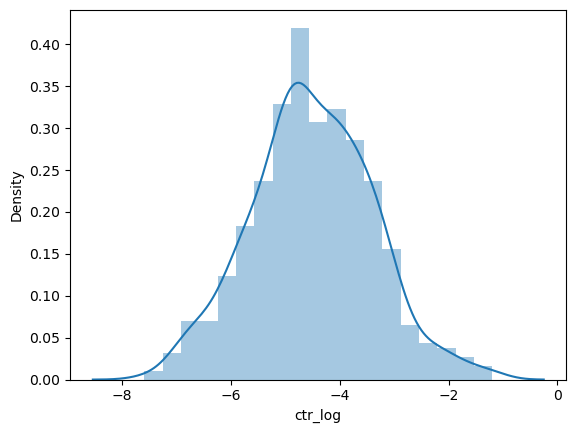

In [28]:
sns.distplot(platform_df.ctr_log)

In [29]:
platform_df.groupby('platform').agg({'ctr':'median'})

event,ctr
platform,
android,0.010695
ios,0.009554
web,0.011213


In [31]:
ttest_ind(platform_df[platform_df.platform =='android'].ctr_log,
         platform_df[platform_df.platform =='ios'].ctr_log)

TtestResult(statistic=0.37737835082801163, pvalue=0.7060862996066313, df=413.0)

In [35]:
f_oneway(platform_df[platform_df.platform =='android'].ctr_log,
        platform_df[platform_df.platform =='ios'].ctr_log,
        platform_df[platform_df.platform =='web'].ctr_log)

F_onewayResult(statistic=0.12221144552264519, pvalue=0.884985296331977)

3 группы стат занчимо не разливаются

f_oneway 0 гипотиза что средняя 1 группы отличается от других групп